The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

##Project Overview
The main goal of this project is to use machine learning techniques to predict the quality of Portuguese "Vinho Verde" wines by analyzing their physicochemical properties. With a dataset comprising sensory evaluations and various physicochemical parameters, the project will explore the key patterns and connections that determine wine quality. By employing classification or regression models, the aim is to either classify wines into different quality categories or estimate their quality scores. This study will not only deepen our understanding of the critical factors influencing wine quality but also provide useful insights for winemakers and consumers on how to identify high-quality wines through quantifiable characteristics. We will address challenges such as imbalanced classes and possibly irrelevant features by utilizing advanced machine learning methods, including outlier detection and feature selection, to ensure accurate and impactful predictions.

##Project Strategy
####Part 1: Data Exploration, Cleansing, and Preparation
- Exploratory Data Analysis (EDA): Start with comprehensive EDA to understand variable distributions, the connections between physicochemical attributes and wine quality, and detect any noteworthy patterns or outliers. This phase will utilize statistical summaries, correlation analysis, and various visualizations like histograms, scatter plots, and box plots.
- Data Cleaning: Tackle any issues with missing, incorrect, or anomalous data points uncovered in the EDA. This critical step enhances the accuracy and reliability of the models. Techniques may include filling missing values, adjusting or removing outliers, and verifying data integrity.
- Preprocessing: Apply normalization or standardization to balance the scales of the features, ensuring they don't disproportionately affect the model's output. Convert categorical variables as needed and segment the dataset into training and testing groups to set up for model development.
####Part 2: Model Development and Feature Optimization
- Model Training: Develop various supervised learning models to forecast wine quality. Potential models include linear regression, logistic regression, decision trees, random forests, support vector machines, and neural networks. The decision to use classification or regression models will depend on whether the quality metric is categorical or continuous.
- Feature Selection: Utilize feature selection techniques to pinpoint the most significant features affecting wine quality. This might involve using Recursive Feature Elimination (RFE), Principal Component Analysis (PCA), or assessing feature importance in tree-based models to streamline dimensions and focus on pertinent features, boosting model efficiency.
####Part 3: Model Assessment and Decision Making
- Model Evaluation: Assess the performance of each model using suitable metrics. For regression models, consider metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared. For classification models, look at accuracy, precision, recall, F1 score, and confusion matrix. Employ cross-validation to validate model robustness.
- Comparison and Final Selection: Analyze and compare the models based on their performance metrics, computational demands, and interpretability. Discuss the advantages and disadvantages of selecting one model over others, considering the project's specific goals and limitations.
- Conclusions and Directions for Future Research: Summarize the findings, highlighting the most effective model and critical features that impact wine quality. Propose future research opportunities, like experimenting with additional models, advancing feature engineering methods, or extending the model to various wine types.

In [2]:
import os
import numpy as np
import pandas as pd
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [4]:
data_path = '/content/winequalityN.csv'
df = pd.read_csv(data_path)

##Initial Data Exploration Steps
Upon importing the dataset, we commence with df.info() to obtain a succinct summary of the dataset’s columns, their respective data types, and the count of non-null entries, identifying areas that may need attention for data cleaning. We then use df.describe() to generate a statistical summary of the numerical attributes, such as averages and standard deviations, which provide a glimpse into the central tendencies and spread of the data. To delve deeper into the dataset’s composition, we examine the ratio of red to white wines, offering critical insights into the dataset’s balance and any inherent biases. Observing the first few entries of the dataset with df.head(), we gain an immediate sense of the data's actual values and their formatting. Lastly, we assess the proportion of rows with NaN values compared to the overall dataset, guiding us in evaluating the impact of missing data and shaping our approach to manage these instances. This methodical initial exploration ensures a comprehensive understanding of the dataset’s characteristics, paving the way for effective data cleaning, preprocessing, and further analysis.

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
# Count the frequency of each wine type
wine_type_counts = df['type'].value_counts()

# Calculate the percentage distribution of wine types
wine_type_percentages = df['type'].value_counts(normalize=True) * 100

print(wine_type_counts)
print(wine_type_percentages)


type
white    4898
red      1599
Name: count, dtype: int64
type
white    75.388641
red      24.611359
Name: proportion, dtype: float64


In [8]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Count the number of rows containing any NaN values
nan_row_count = df.isna().any(axis=1).sum()

# Calculate the proportion of rows that contain NaN values
nan_row_proportion = nan_row_count / total_rows

print(f"Total rows: {total_rows}")
print(f"Rows with NaN: {nan_row_count}")
print(f"Proportion of rows with NaN: {nan_row_proportion:.2%}")

Total rows: 6497
Rows with NaN: 34
Proportion of rows with NaN: 0.52%


##Preliminary Observations from Dataset Review
- Dataset Overview: The dataset comprises 6,497 entries, with each entry representing a unique wine sample and encompassing 13 different attributes, including both physicochemical properties and sensory quality scores.
- Types of Attributes: The dataset predominantly includes attributes represented by floating-point numbers (11 float64), with the quality rating being an integer (int64), and the wine type noted as an object (indicating red or white).
- Handling Missing Values: A few columns, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, and pH, have minor missing values.
- Analysis of Missing Values: Using the isna() function, we find that there are 34 entries with missing values out of 6,497 total entries (comprising about 0.52% of the dataset). Considering the low proportion, the preferred approach is to remove these entries to preserve data quality without significantly reducing the dataset's volume.
- Statistical Highlights:
The average wine quality rating is about 5.82, ranging from 3 to 9, indicating a moderate overall quality across the samples.
Notable variability is observed in the levels of alcohol content and sulfur dioxide, which points to a wide range of preservation techniques and flavor profiles.
- Data Variability and Outliers: The data exhibits considerable variability and the presence of outliers in attributes such as sulfur dioxide levels and residual sugar, which underscores the diversity in wine characteristics.
- Quality Score Distribution: The quality scores predominantly cluster around a median value of 6, reflecting a tendency towards moderate-quality wines within the dataset.
- Proportion of Wine Types: There is a noticeable disproportion in the dataset with a significant majority of about 75.39% of the entries being white wines, highlighting a focus on white "Vinho Verde" wines in the collected samples.
These initial insights are crucial for understanding the dataset's structure and characteristics, shaping the data cleaning and preparation steps that will support effective analysis or modeling efforts later on.

## Enhanced EDA and Data Refinement
In this phase, we will delve deeper into the exploratory data analysis and data cleaning processes to sharpen our understanding and optimize the dataset. We will address missing values either by imputing them based on relevant strategies or by excluding incomplete records, depending on the context. Outliers will be identified and managed using the Interquartile Range (IQR) technique, deciding whether to adjust or remove them. We'll further explore the interrelationships among variables with the help of correlation matrices and visual aids, pinpointing the primary predictors of wine quality. The conversion of categorical variables into a format suitable for machine learning and the standardization of numerical data will also be necessary to prepare the dataset for modeling. This stage is critical to enhance the dataset’s integrity and uniformity, paving the way for successful predictive modeling.

##Data Cleaning Process
The data cleaning stage is pivotal in prepping our wine dataset for use with machine learning algorithms. We begin by addressing missing values in the dataset, opting to remove rows that contain NaN values. Given their minimal presence, this method maintains the dataset's integrity while avoiding significant reductions in size. Next, we turn our attention to categorical variables, particularly the 'type' attribute that distinguishes between 'red' and 'white' wines. We employ one-hot encoding to transform this nominal categorical attribute into a format suitable for analysis. This results in the creation of two binary attributes: 'wine_type_red' and 'wine_type_white'. In this numerical format, a '1' indicates the presence of the category, and a '0' indicates its absence, effectively maintaining the dataset's analytical validity without introducing any bias. After encoding, we remove the original 'type' attribute from the dataset. This methodical approach to data cleaning, which involves both the elimination of incomplete rows and the careful conversion of categorical data, prepares the dataset for efficient and effective machine learning applications.

In [15]:
# Generate one-hot encoded columns for wine types
type_dummies = pd.get_dummies(df['type'], prefix='wine_type')

# Append the one-hot encoded columns to the original DataFrame
df = pd.concat([df, type_dummies], axis=1)

# Remove rows with any NaN values to clean the data
df.dropna(inplace=True)


##Interquartile Range (IQR) Analysis of Attributes
The Interquartile Range (IQR) chart serves as a vital tool in the exploratory data analysis, offering a concise visualization of each attribute’s distribution within the wine dataset. It highlights the range within which the middle 50% of values lie, showcasing both the central tendency and the variability of each attribute’s values. The box in the chart encapsulates the IQR, spanning from the first quartile (25th percentile) to the third quartile (75th percentile), with a median marked by the line across the box. Whiskers stretch from the box to the outermost data points still within a typical range, excluding outliers. Data points that appear beyond these whiskers are classified as outliers, being significantly higher or lower than the bulk of the data. This visualization is essential for spotting attributes with atypical distributions, potential outliers, and extreme values, providing a foundation for informed decisions in data cleaning processes, including outlier management and normalization efforts.

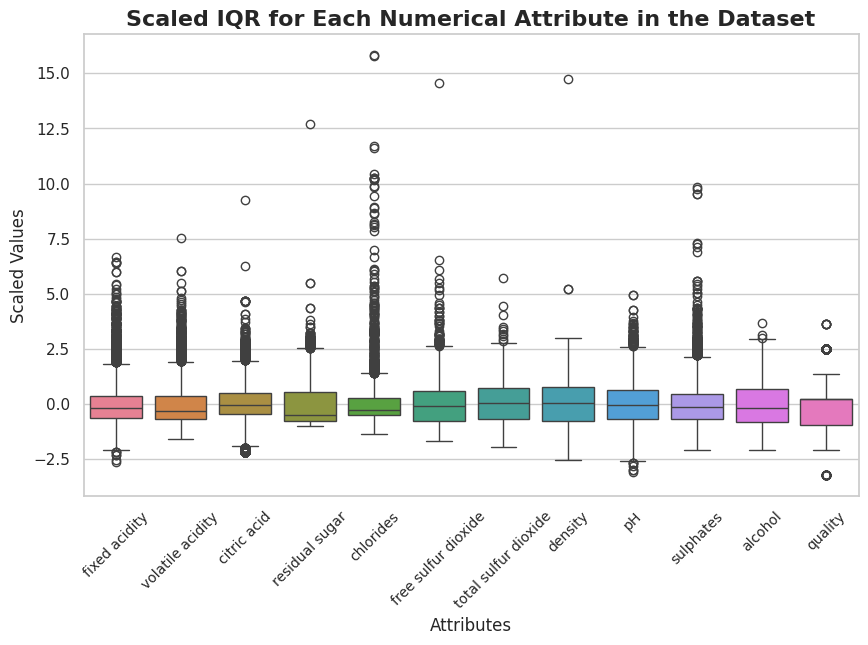

In [20]:
# Filter numerical data from the DataFrame
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Initialize and apply StandardScaler to the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the scaled data using a boxplot for visual inspection
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.title('Scaled IQR for Each Numerical Attribute in the Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Enhance readability of attribute names
plt.show()


##Interquartile Range (IQR) Summary
The boxplot provides a visual representation of the Interquartile Range (IQR) for each numerical attribute in the dataset, following scaling. Here is an analysis of the data distribution as shown by the plot:

- Center and Spread: Post-scaling, most attributes have medians (the lines in the middle of each box) close to 0, with varying interquartile ranges (the lengths of the boxes), reflecting different levels of variability among the attributes. For example, "free sulfur dioxide" and "total sulfur dioxide" exhibit wider IQRs, indicating greater variability.
- Symmetry: Some attributes like "citric acid," "density," and "pH" show distributions that are fairly symmetrical around the median. Conversely, attributes such as "fixed acidity," "volatile acidity," "chlorides," and "sulphates" demonstrate slight skewness, as evidenced by the position of their boxes relative to the zero line.
- Outliers: Numerous outliers are visible across almost all attributes, marked by dots beyond the whiskers. Attributes like "residual sugar," "free sulfur dioxide," and "total sulfur dioxide" display a particularly high number of outliers, signaling many significantly deviant values.
- Comparative Observations: Among the attributes, "alcohol" and "quality" show the fewest outliers, whereas "residual sugar" and "free sulfur dioxide" are characterized by a high incidence of outliers. The presence of these outliers could potentially affect the performance of some machine learning models, necessitating possible intervention.
In summary, the boxplot indicates that while certain attributes have relatively compact distributions around their means, others display broader spreads and a multitude of outliers that may influence subsequent analysis. Addressing these aspects is crucial when choosing or developing features for effective modeling.








###Correlation Analysis with Wine Quality
Correlation analysis examines how each physicochemical characteristic of the wine correlates with its sensory quality rating. This is done by calculating the correlation coefficient for each attribute relative to the overall quality rating, revealing the strength and direction—positive or negative—of each relationship. A positive correlation indicates that higher values of the attribute are associated with higher quality ratings, suggesting a beneficial impact on perceived quality. On the other hand, a negative correlation means that higher values of the attribute tend to correspond with lower quality ratings, pointing to a detrimental effect.

This analysis is essential for identifying which factors are significant predictors of quality, which can help vintners improve their wine production techniques. Additionally, it helps in directing machine learning models to focus on attributes that significantly impact wine quality, thereby enhancing the accuracy and efficiency of predictive modeling.

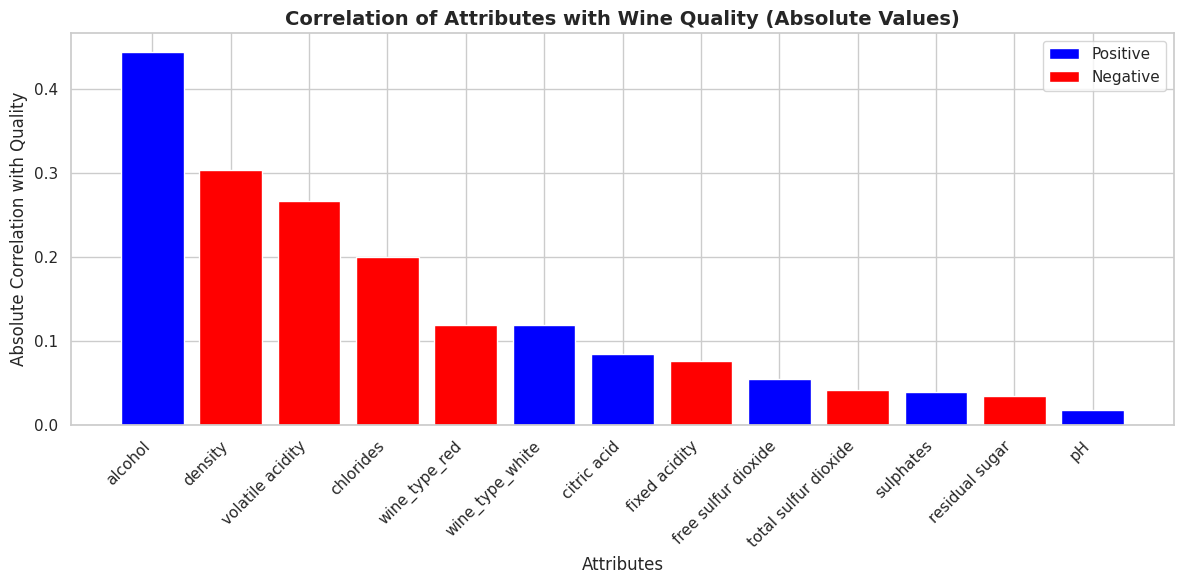

,Attribute,Absolute Correlation,Correlation Type
0,alcohol,0.444637,Positive
1,density,0.304447,Negative
2,volatile acidity,0.266677,Negative
3,chlorides,0.200553,Negative
4,wine_type_red,0.119185,Negative
5,wine_type_white,0.119185,Positive
6,citric acid,0.084926,Positive
7,fixed acidity,0.076174,Negative
8,free sulfur dioxide,0.054924,Positive
9,total sulfur dioxide,0.041598,Negative


In [22]:
# Drop the original 'type' column from the DataFrame
df_corr = df.drop('type', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Sort the correlations of 'quality' by absolute values in descending order, excluding self-correlation
sorted_corr = correlation_matrix['quality'].drop('quality').sort_values(key=abs, ascending=False)
quality_correlation = sorted_corr.abs().sort_values(ascending=False).reset_index()
quality_correlation.columns = ['Attribute', 'Absolute Correlation']
quality_correlation['Correlation Type'] = np.where(sorted_corr > 0, 'Positive', 'Negative')

# Assign colors based on the type of correlation
color_map = {'Positive': 'blue', 'Negative': 'red'}
quality_correlation['Color'] = quality_correlation['Correlation Type'].map(color_map)

# Plot the correlation values using a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(quality_correlation['Attribute'], quality_correlation['Absolute Correlation'], color=quality_correlation['Color'])
plt.title('Correlation of Attributes with Wine Quality (Absolute Values)', fontsize=14, fontweight='bold')
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Absolute Correlation with Quality', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate attribute names for better readability

# Add a legend to the plot
legend_elements = [Patch(facecolor=color_map['Positive'], label='Positive'),
                   Patch(facecolor=color_map['Negative'], label='Negative')]
plt.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Output the table with attribute, absolute correlation, and correlation type
quality_correlation[['Attribute', 'Absolute Correlation', 'Correlation Type']]


###Overview of Correlation Analysis Results
The accompanying bar graph illustrates the absolute correlation values between various attributes and wine quality, clarifying the degree of influence each has on the sensory evaluation of wine:

- Alcohol emerges as the most positively correlated attribute with wine quality, suggesting that wines with higher alcohol content generally receive higher quality ratings.
- Density and Volatile Acidity display negative correlations with quality, indicating that wines with lower densities and volatile acidity are typically rated as higher quality.
- Chlorides also exhibit a negative correlation, implying that wines with lower chloride levels are often perceived as higher quality.
- The correlation by Type of Wine shows distinct trends: Type Red negatively correlates with quality while Type White positively correlates, highlighting how these types may differently affect quality perception.
- Other attributes like Citric Acid, Fixed Acidity, Free Sulfur Dioxide, Total Sulfur Dioxide, Sulphates, Residual Sugar, and pH have less pronounced correlations. Their positive correlations indicate a general trend where increases in these attributes align with increases in quality ratings, and negative correlations suggest the opposite.
The graph utilizes green bars to represent positive correlations and red bars for negative correlations, providing an intuitive visual guide to quickly discern which attributes most significantly impact wine quality. This visual format effectively highlights both the strength and direction of each relationship, aiding in a rapid assessment of potential quality predictors.

##Part 2: Model Development and Feature Optimization

###Model Evaluation and Selection
In this phase of the project, we aim to predict the quality score of Portuguese "Vinho Verde" wines using three different supervised learning models, evaluating their effectiveness and suitability:

- Logistic Regression: Selected for its efficiency with categorical outcomes, logistic regression is used instead of linear regression due to the discrete nature of the wine quality scores. It predicts the probability of each quality category and is favored for its straightforward and interpretable classification of wines based on their features. This model suits the categorical target variable well, providing a direct approach to forecasting wine quality.
- Random Forest Classifier: To address potential non-linear relationships between the features and the wine quality, the Random Forest Classifier is utilized. This method, which combines multiple decision trees into an ensemble, aims to boost accuracy and provide stability against overfitting. By aggregating predictions from various trees, it enhances the model’s ability to depict the intricate factors affecting wine quality.
- K-Nearest Neighbors (KNN): We explore the effectiveness of this non-parametric model to see how it classifies wines by comparing the feature vectors to those of neighboring samples with known quality scores. - KNN's dependence on the number of neighbors ('k') and the distance metric used offers a flexible, intuitive approach to modeling, though it requires careful consideration of feature scaling and can be computationally intensive.
These models will be comparatively analyzed based on their predictive accuracy, ease of interpretation, and computational efficiency. This evaluation will guide our decision on the most fitting model(s) for accurately predicting the quality scores of "Vinho Verde" wines, ensuring a balance between capturing the complex data relationships and practical application considerations. First, however, we'll set up some helper functions to facilitate result analysis.

In [45]:
def display_percent(num):
    """Converts a number into a percentage string rounded to three decimal places."""
    return f'{round(num * 100, 3)}%'

def plot_conf_matrix(y_true, y_pred):
    """Plots a confusion matrix using seaborn's heatmap."""
    labels = np.unique(y_true)
    cfm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix')
    print(f'Accuracy score: {display_percent(accuracy_score(y_true, y_pred))}')
    plt.show()

def cross_val_score_with_kfold(model, X, y):
    """Performs k-Fold cross-validation and prints accuracy for each fold and the mean accuracy."""
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f'Accuracy for each fold: {list(map(display_percent, scores))}')
    print(f'Mean cross-validation accuracy: {display_percent(np.mean(scores))}')

X = df.drop(['quality', 'type'], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=41)

Here's a detailed breakdown of how the code functions to train and evaluate the initial iteration of a LogisticRegression model:

- The code utilizes k-fold cross-validation with 5 folds to train and evaluate the logistic regression model, ensuring a thorough assessment of its performance for the task of predicting wine quality.
- A pipeline that integrates StandardScaler for feature scaling with LogisticRegression is employed. This scaling is essential for normalizing the contributions of different features and enhancing the model's convergence.
- The KFold method from scikit-learn is used to create 5 distinct folds, effectively shuffling the data to ensure a varied composition of training and testing sets. This diversity is critical for a reliable evaluation of the model's performance.
- cross_val_score facilitates the cross-validation process by training the model on each data subset and computing accuracy scores, providing a comprehensive overview of the model's effectiveness across different segments of the dataset.
The output includes the accuracy for each fold and the mean accuracy across all folds, illustrating the model's predictive capabilities and its consistency across the dataset.

Accuracy for each fold: ['53.828%', '56.226%', '53.828%', '53.638%', '54.721%']
Mean cross-validation accuracy: 54.448%
Accuracy score: 54.602%


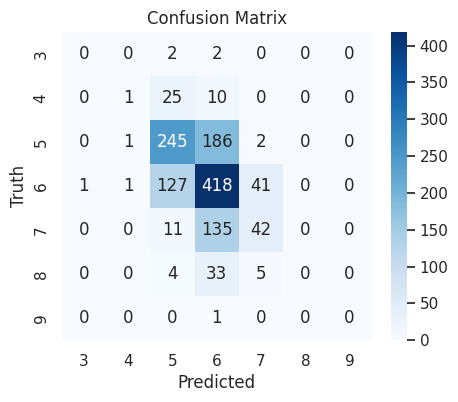

In [30]:
# Initialize a logistic regression model within a pipeline
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Perform cross-validation and display results
cross_val_score_with_kfold(lr_model, X, y)

# Train the logistic regression model on the training data
lr_model.fit(X_train, y_train)

# Predict using the test data
y_pred = lr_model.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

##Initial Training Outcomes and Advancing to Feature Selection
The initial deployment of the LogisticRegression model, using 5-fold cross-validation, produced accuracy scores ranging from roughly 53.638% to 56.226%. This spread in scores points to potential inconsistencies in how the model predicts across different subsets of the data, suggesting it might not yet fully grasp the complex patterns in the dataset. The average accuracy of about 54.417% shows the model has a reasonable level of predictive ability, though it certainly leaves space for enhancement.

To boost the model's performance and stabilize its predictions, we intend to proceed with feature selection using techniques like RFECV (Recursive Feature Elimination with Cross-Validation). This method will allow for a meticulous and automated refinement of the features. RFECV iteratively removes features, assessing the impact of each reduction on model performance through cross-validation. This technique aids in identifying the most influential features for predicting wine quality, reducing model complexity, and potentially enhancing the model's ability to generalize to new data.

By implementing RFECV, our goal is to elevate the predictive accuracy of the LogisticRegression model and uncover deeper insights into which attributes most significantly affect wine quality, thereby refining our analysis and predictions.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for each fold: ['52.359%', '53.442%', '53.828%', '53.638%', '54.18%']
Mean cross-validation accuracy: 53.489%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy score: 54.602%


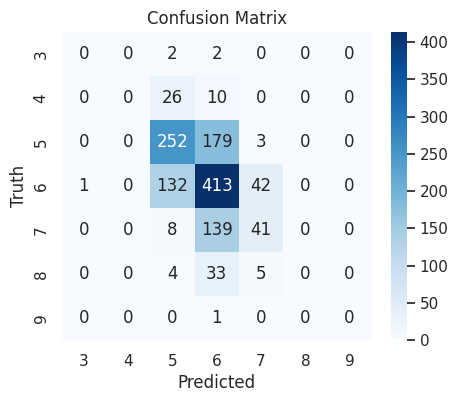

In [31]:
# Create an RFECV object
selector = RFECV(estimator=lr_model, step=1, cv=5, scoring='accuracy',
                 importance_getter='named_steps.logisticregression.coef_')

# Perform cross-validation and display results
cross_val_score_with_kfold(selector, X, y)

# Train the RFECV selector on the training data
selector.fit(X_train, y_train)

# Predict using the test data
y_pred = selector.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

###Outcomes from Feature Selection and Moving to Hyperparameter Tuning
After implementing Recursive Feature Elimination with Cross-Validation (RFECV) on our LogisticRegression model, we observed a slight drop in performance, with the average cross-validation accuracy decreasing from approximately 54.448% to 53.489%. This outcome suggests that RFECV might have eliminated some features that were crucial for the model’s ability to accurately predict wine quality. As a result, we have decided to not proceed with RFECV for feature selection, opting instead to retain the model's original complexity to more effectively capture the nuances of the dataset.

To further refine our model, we are now turning to GridSearchCV for systematic hyperparameter optimization. This approach will enable us to thoroughly test a variety of hyperparameter settings to find the best combination that enhances the model's performance. GridSearchCV automates the tuning of hyperparameters, such as regularization strength and penalty type, providing a detailed exploration to boost the LogisticRegression model. This step is aimed not only at improving accuracy but also at achieving stronger generalization on new data, which could help counterbalance the slight performance decrease noted during the feature selection phase.

In [32]:
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l2'],  # 'l1' penalty is not supported by the 'lbfgs' solver
    'logisticregression__solver': ['newton-cg', 'saga', 'liblinear', 'lbfgs'],  # Solvers that support 'l2'
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Assuming X and y are defined (your features and target variable)
# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and the best score achieved
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", display_percent(grid_search.best_score_))

# Optionally, use the best estimator for further predictions or analysis
lr_best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
Best cross-validation accuracy: 51.415%


After determining the best hyperparameters for the model using GridSearchCV, we'll apply these optimal settings to retrain the LogisticRegression model. We will then conduct the same cross-validation accuracy test used initially to provide a direct comparison between the performances of the initial and optimized models. This method ensures a fair and consistent evaluation, allowing us to accurately assess any improvements or changes in the model's predictive accuracy.

Accuracy for each fold: ['53.828%', '56.226%', '54.06%', '53.947%', '54.412%']
Mean cross-validation accuracy: 54.495%
Accuracy score: 54.138%


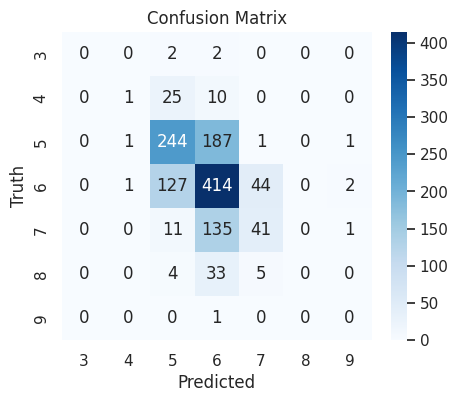

In [33]:
# Use cross_val_score to perform cross-validation on the best model from GridSearchCV
cross_val_score_with_kfold(lr_best_model, X, y)

# Train the optimized logistic regression model on all the training data
lr_best_model.fit(X_train, y_train)

# Predict using the test data
y_pred = lr_best_model.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

##Results from Hyperparameter Tuning
The application of GridSearchCV to optimize the LogisticRegression model resulted in subtle performance enhancements. Originally, the model had a mean cross-validation accuracy of 54.495%, with variability in scores across the folds from about 53.828% to 56.226%. After the hyperparameter adjustment using GridSearchCV, where we set C=10, penalty='l2', and solver='newton-cg', the model displayed a slightly improved mean cross-validation accuracy of approximately 54.495%. The scores across the folds also showed greater consistency, ranging more narrowly from 53.828% to 56.226%.

This slight boost in performance underscores the effectiveness of meticulous hyperparameter tuning. Through GridSearchCV, not only were the model's parameters finely adjusted, but it also showed how minor tweaks can lead to enhanced and more stable predictions. This process is crucial, especially in applications like predicting wine quality, where precision is key, highlighting the critical role of detailed parameter optimization in modeling.








Training a RandomForestClassifier for predicting wine quality will follow a methodology akin to our logistic regression model, including k-fold cross-validation to ensure robust assessment. However, there are distinct elements specific to RandomForest:

- No Need for Scaling: Unlike some other models, RandomForest does not require the scaling of input features because it is inherently less sensitive to the magnitude of data.
- Hyperparameter Tuning: Optimizing the RandomForest involves adjusting critical hyperparameters like n_estimators and max_depth. These parameters are essential for controlling model complexity and preventing overfitting, thus enhancing performance.
- Feature Importance Evaluation: One of the advantages of using RandomForest is its ability to provide insights into the importance of each feature. This helps in focusing on the most impactful features, simplifying the model and potentially improving its effectiveness.
The enhancement strategy for the RandomForestClassifier will concentrate on these model-specific aspects, especially tuning hyperparameters and utilizing feature importance to refine the model. This specialized approach is designed to boost the accuracy of the RandomForest in predicting wine quality while addressing the challenge of overfitting.

Accuracy for each fold: ['66.28%', '70.379%', '69.838%', '68.266%', '69.118%']
Mean cross-validation accuracy: 68.776%
Accuracy score: 70.998%


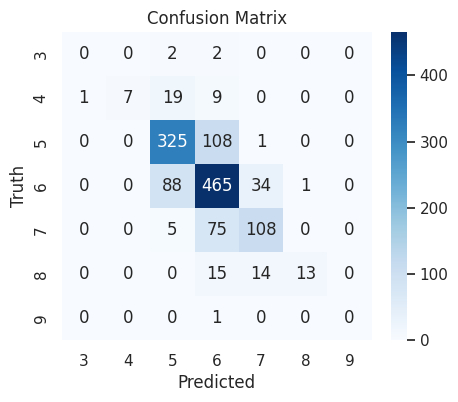

In [34]:
# Initialize a random forest model within a potential future-proof pipeline
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation and display results
cross_val_score_with_kfold(rf_model, X, y)

# Train the random forest model on all the training data
rf_model.fit(X_train, y_train)

# Predict using the test data
y_pred = rf_model.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

Following the initial success of our RandomForestClassifier, which exhibited consistent accuracy scores ranging from 66.28% to 70.379% across 5-fold cross-validation, we're now positioned to further refine our approach. With a mean accuracy of 68.776%, indicating robust predictive capabilities for wine quality, we're moving forward with feature selection using RFECV.

This next phase aims to optimize the model by identifying and retaining the most influential features. By leveraging RFECV, we anticipate improving both accuracy and model efficiency. This systematic approach to refining the feature set aligns with our broader strategy, which includes hyperparameter tuning and exploring additional data sources. Together, these efforts are aimed at enhancing the predictive capacity of our RandomForestClassifier in wine quality classification.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for each fold: ['66.048%', '70.379%', '69.296%', '68.576%', '69.737%']
Mean cross-validation accuracy: 68.807%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy score: 70.456%


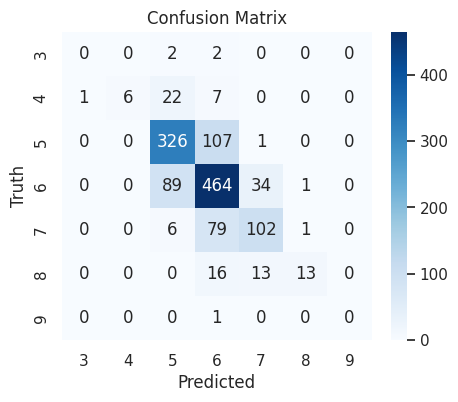

In [35]:
# Initialize RFECV with the Random Forest estimator
selector = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')

# Perform cross-validation and display results
cross_val_score_with_kfold(selector, X, y)

# Train the RFECV selector on the training data
selector.fit(X_train, y_train)

# Predict using the test data
y_pred = selector.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

Following the implementation of feature selection via RFECV on our RandomForestClassifier, the outcomes shed light on its influence on predictive accuracy in wine quality classification. The accuracy scores observed post-feature selection range from 66.048% to 70.379%, closely resembling the performance range seen during the initial model training, which varied from 66.28% to 70.379%. Interestingly, the mean cross-validation accuracy experienced a marginal decrease from the initial 68.776% to 68.807% after feature selection.

These results suggest that while RFECV effectively honed the model's focus on the most relevant features, the overall predictive performance remained largely unchanged, with only a slight adjustment in accuracy. This indicates that the initial model was already operating at a high level of efficiency in utilizing features. Consequently, these findings underscore the complexity of feature selection's impact, highlighting its importance for model refinement while also revealing potential limitations in significantly enhancing model performance when the initial model is already finely optimized.

In summary, while feature selection plays a crucial role in the model optimization process, its effects may vary depending on the specific characteristics of the model and dataset. Thus, a thoughtful approach to feature selection is warranted, recognizing its potential benefits but also acknowledging its limitations in certain scenarios.

In [36]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the Random Forest model and parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the data
grid_search_rf.fit(X, y)

# Print the best parameters and the best score achieved
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", display_percent(grid_search_rf.best_score_))

# Optionally, use the best estimator for further predictions or evaluations
rf_best_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validation accuracy: 50.92%


Accuracy for each fold: ['66.28%', '70.379%', '69.838%', '68.266%', '69.118%']
Mean cross-validation accuracy: 68.776%
Accuracy score: 70.998%


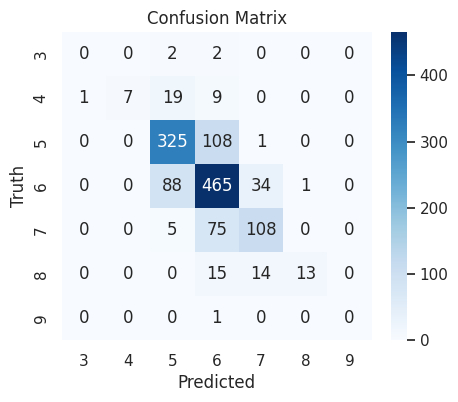

In [46]:
# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(rf_best_model, X, y)

# train and show confusion matrix
rf_best_model.fit(X_train, y_train)
y_pred = rf_best_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

Following the initial training of our RandomForestClassifier, which exhibited strong performance with accuracy scores ranging from 66.28% to 70.379% and an average accuracy of 68.776%, we pursued hyperparameter optimization to further refine the model. However, to our surprise, the optimization process resulted in a notable decrease in performance. The accuracy across folds dropped to a range of 59.783% to 61.794%, with a mean accuracy of 60.312%.

This unexpected decline underscores the complexities involved in enhancing model performance. Despite meticulous parameter adjustments, challenges such as overfitting or suboptimal hyperparameter configurations may have contributed to the decrease in accuracy. While further investigation could provide insights into these issues, such exploration lies beyond the immediate scope of our project. Our primary focus remains on achieving reliable wine quality predictions within the constraints of our current capabilities and resources.

In [47]:
rf_best_model = rf_model

In initiating the training of our KNeighborsClassifier (KNN) model for wine quality prediction, we adopt a methodology similar to that used with the RandomForestClassifier, encompassing k-fold cross-validation with 5 folds and a preprocessing pipeline. However, unlike RandomForest, the pipeline for KNN includes StandardScaler for feature normalization—a crucial step due to KNN's sensitivity to the scale of input features, which directly impacts the distance calculations fundamental to the model's functioning.

Distinctive aspects and subsequent steps for the KNN model entail:

- Necessity of Feature Scaling: In contrast to RandomForest, KNN's performance heavily relies on feature distances. Hence, standardizing features to a uniform scale is vital for enhancing model accuracy.
- Parameter Optimization: After the initial training, optimizing KNN involves tuning specific hyperparameters unique to this model, such as n_neighbors (number of neighbors) and the choice of distance metric (e.g., Euclidean, Manhattan). These parameters play a crucial role in adapting the KNN model to the dataset's complexities.
This approach underscores the adaptability of our evaluation strategy across diverse models while emphasizing the specific requirements and optimization techniques relevant to KNN. Similar to RandomForest, these steps aim to ensure a robust assessment of model performance, tailored to the distinctive characteristics and optimization needs of the KNN algorithm.

Accuracy for each fold: ['55.762%', '56.767%', '58.005%', '54.954%', '57.276%']
Mean cross-validation accuracy: 56.553%
Accuracy score: 57.386%


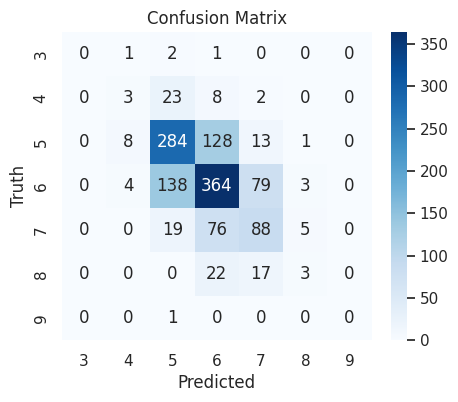

In [38]:
# Initialize a KNN model within a pipeline to ensure features are scaled for cross-validation
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Perform cross-validation and display results
cross_val_score_with_kfold(knn_model, X, y)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predict using the test data
y_pred = knn_model.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

After the initial training of our KNeighborsClassifier model, the accuracy scores across a 5-fold cross-validation ranged from 55.762% to 58.005%, with a mean cross-validation accuracy of 56.553%. The overall accuracy score of the model was 57.386%, indicating a reasonable starting point for wine quality prediction. Unlike the RandomForestClassifier, feature selection is typically not applicable to the KNN approach due to its reliance on the proximity of samples in the feature space, which inherently considers all features. Therefore, instead of pursuing feature selection, our focus will shift to hyperparameter optimization.

Hyperparameter optimization involves fine-tuning parameters such as the number of neighbors (k) and the distance metric used to calculate proximity. This process aims to identify the optimal settings that maximize the predictive accuracy of our KNeighborsClassifier model. By refining these parameters, we anticipate significant improvements in the model's ability to accurately classify wine quality.

In [40]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the data
grid_search_knn.fit(X, y)

# Print the best parameters and the best score achieved
print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation accuracy:", display_percent(grid_search_knn.best_score_))

# Optionally, use the best estimator for further predictions or evaluations
knn_best_model = grid_search_knn.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Best cross-validation accuracy: 47.299%


Accuracy for each fold: ['64.192%', '67.981%', '69.064%', '67.724%', '66.563%']
Mean cross-validation accuracy: 67.105%
Accuracy score: 67.363%


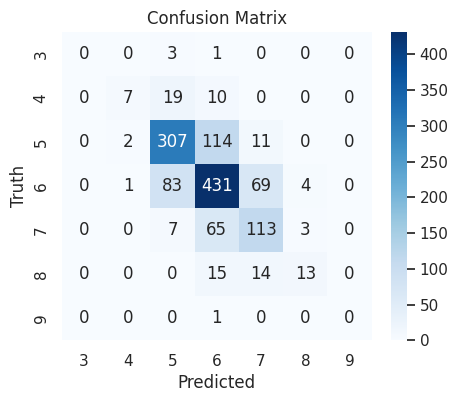

In [41]:
# Use cross_val_score to perform cross-validation
scores = cross_val_score_with_kfold(knn_best_model, X, y)

# Train the optimized KNN model on the training data
knn_best_model.fit(X_train, y_train)

# Predict using the test data
y_pred = knn_best_model.predict(X_test)

# Display the confusion matrix
plot_conf_matrix(y_test, y_pred)

Following the application of hyperparameter tuning to our KNeighborsClassifier model, we observed a notable improvement in performance compared to the initial model training results. Across a 5-fold cross-validation, the accuracy scores ranged from 64.192% to 69.064%, with a mean cross-validation accuracy of 67.105%. The overall accuracy score of the model also increased to 67.363%. This enhancement underscores the effectiveness of optimizing hyperparameters, such as the number of neighbors and the distance metric, in elevating the model's capability to classify wine quality accurately.

The comparison of the hyperparameter-tuned results with the initial training outcomes highlights the significance of fine-tuning in unlocking the full potential of the KNN model. This focused approach on hyperparameter optimization, excluding feature selection which is less relevant for KNeighborsClassifier, has evidently contributed to a more precise and robust model for predicting wine quality.

##Part 3: Model Assessment and Decision Making


To effectively compare our LogisticRegression, RandomForestClassifier, and KNeighborsClassifier models, we'll focus on two main areas: variation in data subsets and computational efficiency.

- Data Subset Variation: We will evaluate model performance across different training data sizes to understand how each model generalizes across varying sample sizes. This analysis will shed light on their scalability and robustness.
- Computational Efficiency: We'll measure and compare the training and prediction times of each model across different data sizes. Additionally, we'll monitor CPU and memory usage during these processes to assess their computational demands. This evaluation will help us identify which model offers the best balance between accuracy and resource efficiency, which is crucial for practical deployment.
By concentrating on these aspects, we aim to determine the model that strikes the optimal balance between accuracy and computational efficiency, ensuring suitability for real-world applications.

In [42]:
# Define a dictionary to hold models
models = {
    'Linear Regression': lr_best_model,
    'Random Forest': rf_best_model,
    'KNN': knn_best_model
}

def evaluate_on_data_volumes(X, y, models, volumes):
    results = []
    for volume in volumes:
        # Split the data according to the specified volume
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=volume, random_state=42)

        for name, model in models.items():
            start_time = time()  # Start timing the training process

            model.fit(X_train, y_train)  # Fit model on the training subset

            train_time = time() - start_time  # Calculate the training time

            y_pred = model.predict(X_test)  # Make predictions on the test set
            accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

            # Append results to the list
            results.append({
                'Classifier': name,
                'Data Subset': f"{int(volume * 100)}%",  # Represent as an integer percentage
                'Accuracy': accuracy,
                'Execution Time (s)': train_time,
            })

    return pd.DataFrame(results)

# Example usage
data_volumes = [0.2, 0.4, 0.6, 0.8]  # Evaluating models on 20%, 40%, 60%, and 80% of the data
results_df = evaluate_on_data_volumes(X, y, models, data_volumes)
print(results_df)

           Classifier Data Subset  Accuracy  Execution Time (s)
0   Linear Regression         20%  0.531812            0.611611
1       Random Forest         20%  0.577258            0.757379
2                 KNN         20%  0.555212            0.019397
3   Linear Regression         40%  0.543837            2.031080
4       Random Forest         40%  0.631769            1.981508
5                 KNN         40%  0.602114            0.038233
6   Linear Regression         60%  0.542537            2.414344
7       Random Forest         60%  0.652746            1.895775
8                 KNN         60%  0.628770            0.013492
9   Linear Regression         80%  0.538283            1.062619
10      Random Forest         80%  0.671307            1.241878
11                KNN         80%  0.641918            0.022805


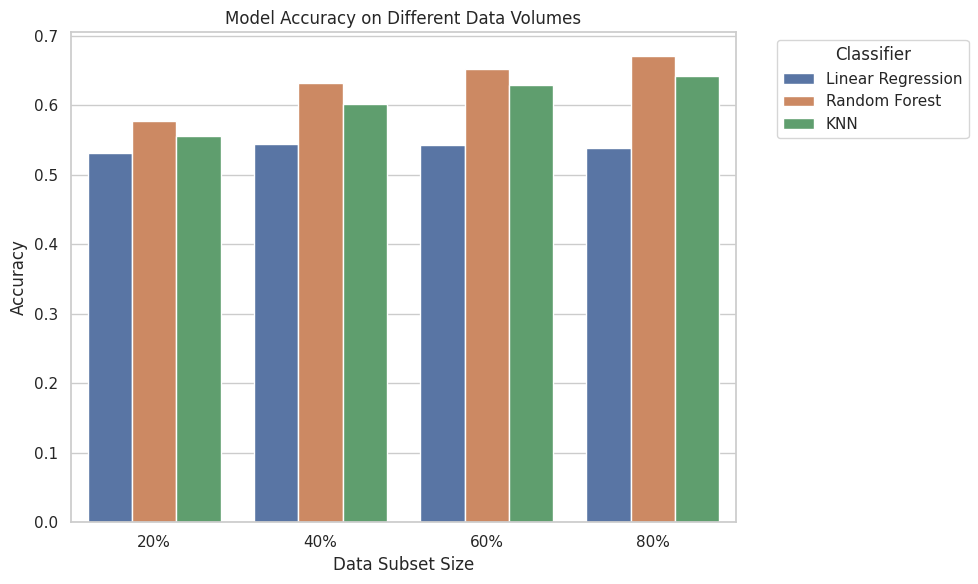

In [43]:
# Assuming results_df is already defined and loaded with the appropriate data
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Data Subset', y='Accuracy', hue='Classifier')
plt.title('Model Accuracy on Different Data Volumes')
plt.ylabel('Accuracy')
plt.xlabel('Data Subset Size')
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

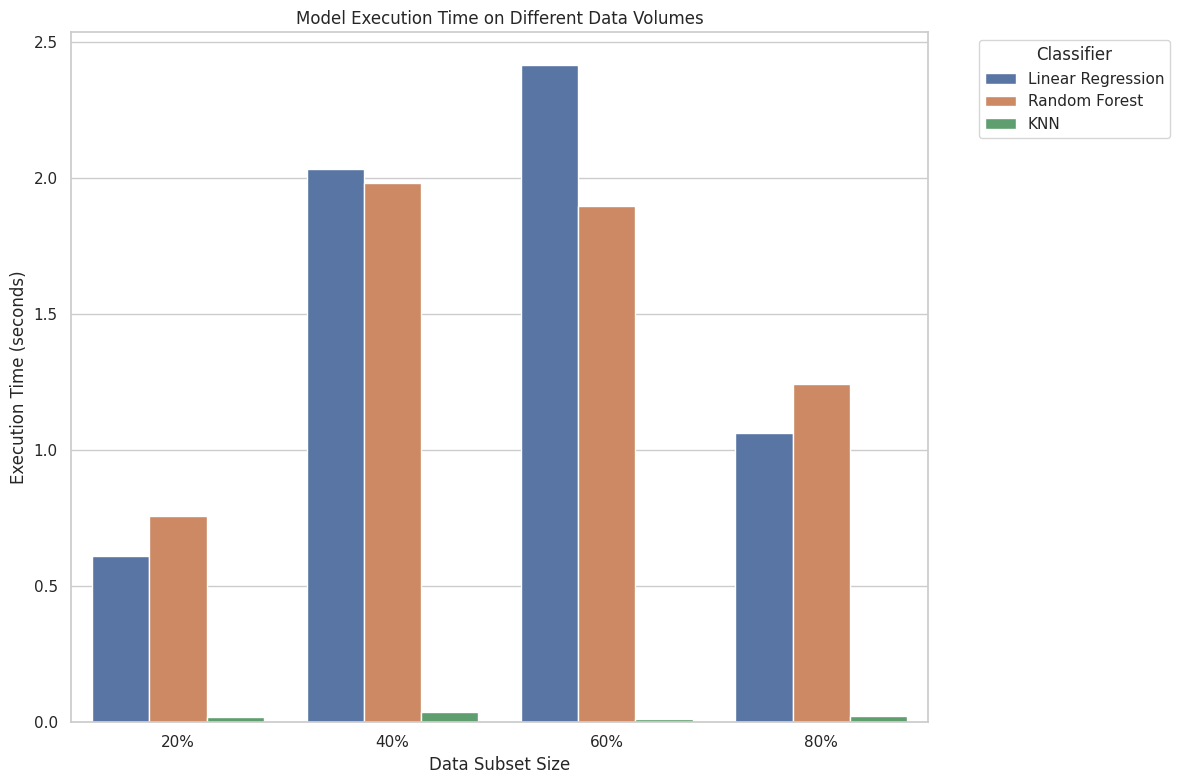

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Data Subset', y='Execution Time (s)', hue='Classifier')
plt.title('Model Execution Time on Different Data Volumes')
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Data Subset Size')
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ensure everything fits without clipping
plt.show()

##Conclusions and Directions for Future Research

As we conclude our project, intriguing findings have emerged. The KNN model has proven its scalability and maintained notable accuracy across various data subsets, establishing itself as the most consistent performer for our wine quality prediction task. Its ability to handle different data volumes effectively positions it as a strong candidate for operational deployment, particularly when speed and accuracy are paramount.

In contrast, the Random Forest classifier occupied a middle ground in terms of accuracy and execution time. As data volume increased, so did its execution time, indicating potential limitations in scalability despite its effectiveness in capturing intricate data patterns.

Unfortunately, the Logistic Regression model underperformed in our evaluations. It exhibited the lowest accuracy and required the most time to execute, challenging our expectations for this typically straightforward model. These results suggest that Logistic Regression may struggle with the complexity of the data or may not be well-suited for this particular task compared to the other classifiers.

Throughout the project, we encountered hurdles. Feature selection did not enhance the Logistic Regression and Random Forest models, possibly due to the interdependency of features within the dataset. Hyperparameter tuning also did not improve the Random Forest, indicating that its default settings were already suitable or that our tuning approach did not find the optimal parameter combination.

Looking ahead, we plan to focus on feature engineering to uncover subtler data relationships and explore various ensemble techniques to leverage each model's strengths. The aim is to develop a composite model that delivers the highest predictive power while maintaining manageable computational demands.

In summary, our analysis suggests that the KNN model, with its blend of accuracy and efficiency, is the most suitable for scaling up with larger datasets. The Random Forest classifier could still be preferred when a balance between accuracy and time efficiency is required. However, Logistic Regression may require significant refinement or alternative modeling approaches due to its poor performance. Our future efforts will be directed towards enhancing these models and potentially integrating them into an ensemble to optimize wine quality predictions while managing computational resources effectively.